# HAR Pre Processing

In [24]:
import os
import numpy as np
import pandas as pd
import pandas as pd
from matplotlib import pyplot as plt

In [25]:
activity_map = {
    0   : 'transient',
    1   : 'lying',
    2   : 'sitting',
    3   : 'standing',
    4   : 'walking',
    5   : 'running',
    6   : 'cycling',
    7   : 'Nordic_walking',
    9   : 'watching_TV',
    10  : 'computer_work',
    11  : 'car driving',
    12  : 'ascending_stairs',
    13  : 'descending_stairs',
    16  : 'vacuum_cleaning',
    17  : 'ironing',
    18  : 'folding_laundry',
    19  : 'house_cleaning',
    20  : 'playing_soccer',
    24  : 'rope_jumping'
}

position_map = {
    0 : "hand",
    1 : "chest",
    2 : "ankle"
}

In [26]:
path = "data/PAMAP2_Dataset/Protocol/"

In [35]:
def load_pamap2_subjects(root):
    # Definir os nomes das colunas conforme a documentação do dataset PAMAP2
    cols = [
        'timestamp', 'activityID', 'heart_rate',
        'hand_temp', 'hand_acc_16g_x', 'hand_acc_16g_y', 'hand_acc_16g_z',
        'hand_acc_6g_x', 'hand_acc_6g_y', 'hand_acc_6g_z',
        'hand_gyro_x', 'hand_gyro_y', 'hand_gyro_z',
        'hand_mag_x', 'hand_mag_y', 'hand_mag_z',
        'hand_orientation_1', 'hand_orientation_2', 'hand_orientation_3', 'hand_orientation_4',
        'chest_temp', 'chest_acc_16g_x', 'chest_acc_16g_y', 'chest_acc_16g_z',
        'chest_acc_6g_x', 'chest_acc_6g_y', 'chest_acc_6g_z',
        'chest_gyro_x', 'chest_gyro_y', 'chest_gyro_z',
        'chest_mag_x', 'chest_mag_y', 'chest_mag_z',
        'chest_orientation_1', 'chest_orientation_2', 'chest_orientation_3', 'chest_orientation_4',
        'ankle_temp', 'ankle_acc_16g_x', 'ankle_acc_16g_y', 'ankle_acc_16g_z',
        'ankle_acc_6g_x', 'ankle_acc_6g_y', 'ankle_acc_6g_z',
        'ankle_gyro_x', 'ankle_gyro_y', 'ankle_gyro_z',
        'ankle_mag_x', 'ankle_mag_y', 'ankle_mag_z',
        'ankle_orientation_1', 'ankle_orientation_2', 'ankle_orientation_3', 'ankle_orientation_4'
    ]
    selected_cols = [
        'timestamp', 'activityID', 
        'hand_acc_16g_x', 'hand_acc_16g_y', 'hand_acc_16g_z',
        'hand_gyro_x', 'hand_gyro_y', 'hand_gyro_z',
        'chest_acc_16g_x', 'chest_acc_16g_y', 'chest_acc_16g_z',
        'chest_gyro_x', 'chest_gyro_y', 'chest_gyro_z',
        'ankle_acc_16g_x', 'ankle_acc_16g_y', 'ankle_acc_16g_z',
        'ankle_gyro_x', 'ankle_gyro_y', 'ankle_gyro_z',
        "id"
    ]
    
    dataframes = []

    for i in range(101, 110):
        print(i)
        path = os.path.join(root, f'subject{i:02d}.dat')
        if not os.path.isfile(path):
            print(f'File not found: {path}')
            continue  
        try:
            subject = pd.read_table(path, header=None, sep='\s+')
            subject.columns = cols 
            subject['id'] = i
            subject = subject[selected_cols]
            dataframes.append(subject)
        except Exception as e:
            print(f'Erro ao ler o arquivo {path}: {e}')
    
    # Concatenar todos os dataframes em um único dataframe
    if dataframes:
        output = pd.concat(dataframes, ignore_index=True)
    else:
        output = pd.DataFrame(columns=cols + ['id'])
    
    return output


data = load_pamap2_subjects(path)

101
102
103
104
105
106
107
108
109


In [36]:
data.head()

,timestamp,activityID,hand_acc_16g_x,hand_acc_16g_y,hand_acc_16g_z,hand_gyro_x,hand_gyro_y,hand_gyro_z,chest_acc_16g_x,chest_acc_16g_y,...,chest_gyro_x,chest_gyro_y,chest_gyro_z,ankle_acc_16g_x,ankle_acc_16g_y,ankle_acc_16g_z,ankle_gyro_x,ankle_gyro_y,ankle_gyro_z,id
0,8.38,0,2.37223,8.60074,3.51048,-0.092217,0.056812,-0.015845,0.238080,9.80003,...,-0.005065,-0.006781,-0.005663,9.65918,-1.65569,-0.099797,0.008300,0.009250,-0.017580,101
1,8.39,0,2.18837,8.56560,3.66179,-0.024413,0.047759,0.006474,0.319530,9.61282,...,0.013685,0.001486,-0.041522,9.69370,-1.57902,-0.215687,-0.006577,-0.004638,0.000368,101
2,8.40,0,2.37357,8.60107,3.54898,-0.057976,0.032574,-0.006988,0.235593,9.72421,...,-0.039923,0.034056,-0.002113,9.58944,-1.73276,0.092914,0.003014,0.000148,0.022495,101
3,8.41,0,2.07473,8.52853,3.66021,-0.002352,0.032810,-0.003747,0.388697,9.53572,...,0.007513,-0.010498,-0.020684,9.58814,-1.77040,0.054545,0.003175,-0.020301,0.011275,101
4,8.42,0,2.22936,8.83122,3.70000,0.012269,0.018305,-0.053325,0.315800,9.49908,...,-0.003822,-0.011217,-0.025975,9.69771,-1.65625,-0.060809,0.012698,-0.014303,-0.002823,101


In [37]:
def preprocess_sample(df_sample):
    selected_cols = [
        'hand_acc_16g_x', 'hand_acc_16g_y', 'hand_acc_16g_z', 
        'hand_gyro_x', 'hand_gyro_y', 'hand_gyro_z',
        'chest_acc_16g_x', 'chest_acc_16g_y', 'chest_acc_16g_z', 
        'chest_gyro_x', 'chest_gyro_y', 'chest_gyro_z', 
        'ankle_acc_16g_x', 'ankle_acc_16g_y', 'ankle_acc_16g_z', 
        'ankle_gyro_x', 'ankle_gyro_y', 'ankle_gyro_z',
    ]
    label = df_sample.activityID.iloc[0]
    df_sample = df_sample.sort_values('timestamp').reset_index(drop=True)
    m = df_sample[selected_cols].values
    # resample 100hz to 20hz
    m = m[::5]
    # reshape to windows of 3 seconds

    if m.shape[0] < 60:
        return None, None
    n_samples = m.shape[0] // 60
    m = m[:n_samples * 60].reshape(n_samples, 60, -1)

    # transform each 6 features into new samples
    m_extended = np.zeros((n_samples * 3, 60, 6))
    positions = np.zeros((n_samples * 3))
    for i in range(3):
        m_extended[i*n_samples:(i+1)*n_samples] = m[:, :, i*6:i*6+6]
        positions[i*n_samples:(i+1)*n_samples] = i
    label = np.array([label] * n_samples * 3)

    # drop if there are any nan values
    idx_nan = np.isnan(m_extended).any(axis=(1, 2))
    m_extended = m_extended[~idx_nan]
    label = label[~idx_nan]
    positions = positions[~idx_nan]

    return m_extended, label, positions

In [38]:
samples = data.groupby(['id', 'activityID']).apply(preprocess_sample)

/tmp/ipykernel_12091/410474657.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  samples = data.groupby(['id', 'activityID']).apply(preprocess_sample)


In [39]:
data = []
labels = []
positions_clean = []
for s in samples:
    if s[0] is not None:
        data.append(s[0])
        labels.append(s[1])
        positions_clean.append(s[2])

In [40]:
data = np.concatenate(data, axis=0)
labels = np.concatenate(labels, axis=0)
positions_clean = np.concatenate(positions_clean, axis=0)

In [41]:
data.shape

(25458, 60, 6)

In [15]:
def plot_sample(sample, label, position = None):
    fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 5))

    for i in range(3):
        axs[0].plot(sample[:, i], label=f'Acc {i}')
        axs[1].plot(sample[:, i+3], label=f'Gyro {i}')

    axs[0].set_title(f'Accelerometer')
    axs[0].legend()
    axs[1].set_title(f'Gyroscope')
    axs[1].legend()
    if position is not None:
        plt.suptitle(f'Activity: {activity_map[label]} - Position: {position_map[position]}') 
    else:
        plt.suptitle(f'Activity: {activity_map[label]}') 
    plt.show()

def plot_random_sample(data_clean, labels, positions_clean):
    idx = np.random.randint(0, data_clean.shape[0])
    plot_sample(data_clean[idx], labels[idx], positions_clean[idx])

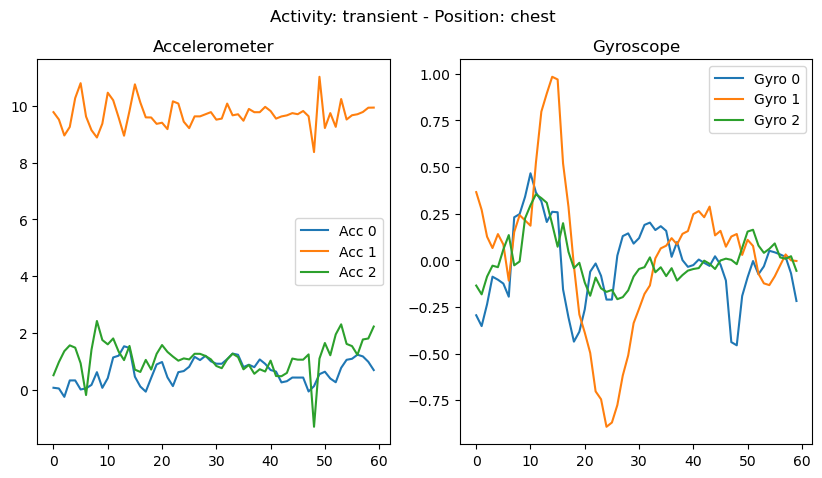

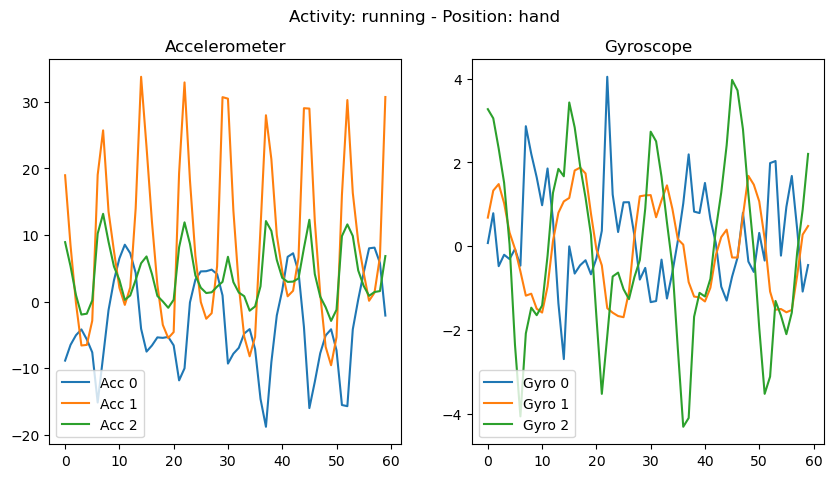

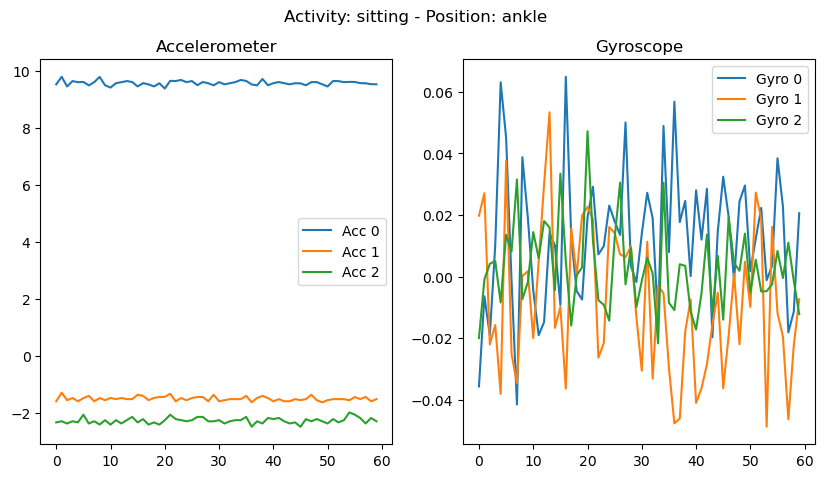

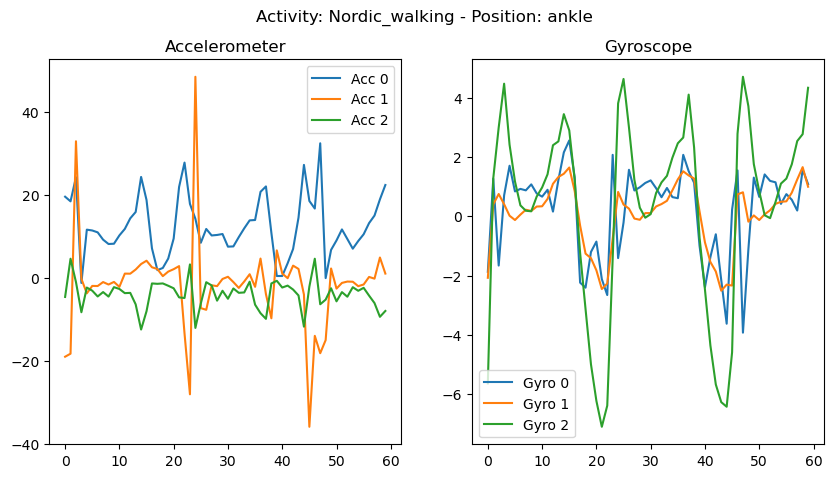

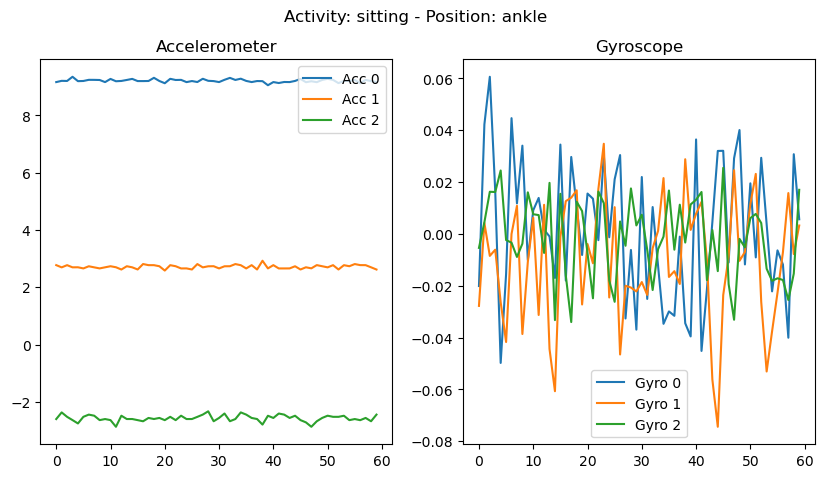

In [42]:
for i in range(5):
    plot_random_sample(data, labels, positions_clean)

In [43]:
if not os.path.exists("data/pretext_har"):
    os.makedirs("data/pretext_har")

In [44]:
df = []
feat_mapper = {
    0 : "accel-x",
    1 : "accel-y",
    2 : "accel-z",
    3 : "gyro-x",
    4 : "gyro-y",
    5 : "gyro-z"
}
for i in range(data.shape[0]):
    row = {}
    for feat in range(data.shape[2]):
        for t in range(data.shape[1]):
            row[f"{feat_mapper[feat]}_{t}"] = data[i, t, feat]
    row["standard activity code"] = labels[i]
    row["position"] = positions_clean[i]
    df.append(row)
df = pd.DataFrame(df)

In [46]:
np.random.seed(42)
train_idx = np.random.choice(df.index, int(0.8 * len(df)), replace=False)   
train_df = df.loc[train_idx]
val_df = df.drop(train_idx)
train_df.to_csv("data/pretext_har/train.csv", index=False)
val_df.to_csv("data/pretext_har/validation.csv", index=False)
val_df.to_csv("data/pretext_har/test.csv", index=False)